In [1]:
import os, sys

sys.path.append('../..')

from astroclip.astrodino.data.loaders import make_dataset



/mnt/home/lparker/python_envs/toto/lib/python3.10/site-packages/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/mnt/home/lparker/python_envs/toto/lib/python3.10/site-packages/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/mnt/home/lparker/python_envs/toto/lib/python3.10/site-packages/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


In [4]:
from astroclip.astrodino.data.augmentations import DataAugmentationAstroDINO, ToRGB

augmentation = DataAugmentationAstroDINO(
    global_crops_scale=(0.8, 1.0),
    local_crops_scale=(0.4, 0.6),
    global_crops_size=144,
    local_crops_size=60,
    local_crops_number=8)

test_dataset = make_dataset(
        dataset_str='LegacySurvey:split=test:root=/mnt/ceph/users/polymathic/external_data/astro/DECALS_Stein_et_al/:extra=""',
        transform = augmentation,
    )

iterable_dset = iter(test_dataset)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


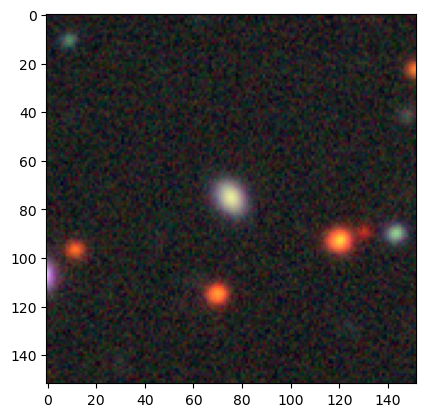

In [5]:
%pylab inline

img = next(iterable_dset)[0]
torgb = ToRGB()

imshow(torgb(np.array(img).T))

In [6]:
imgs = augmentation(img)

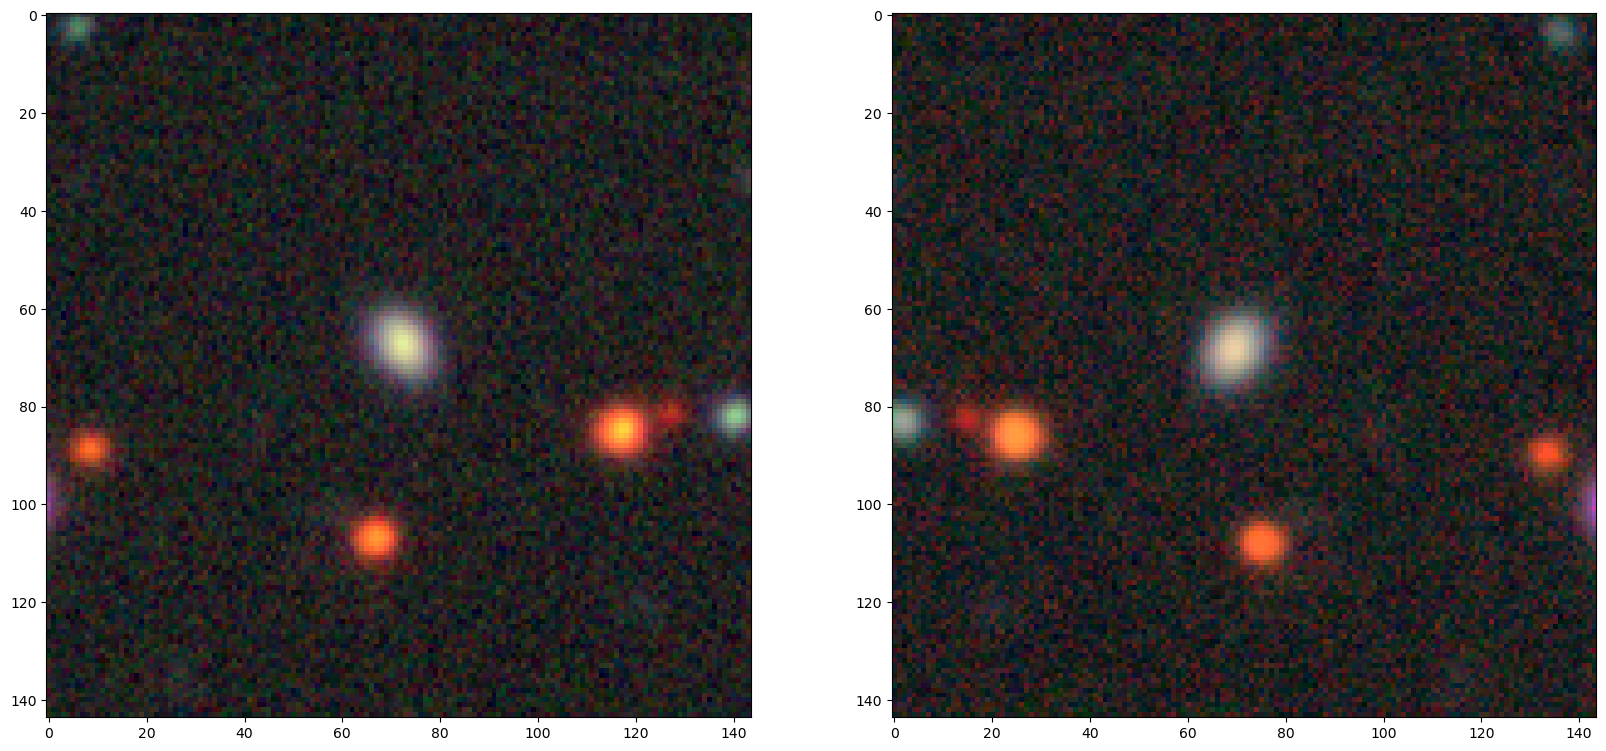

In [10]:
# plot all global_crops

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

for i in range(2):
    axs[i].imshow(imgs['global_crops'][i].T)

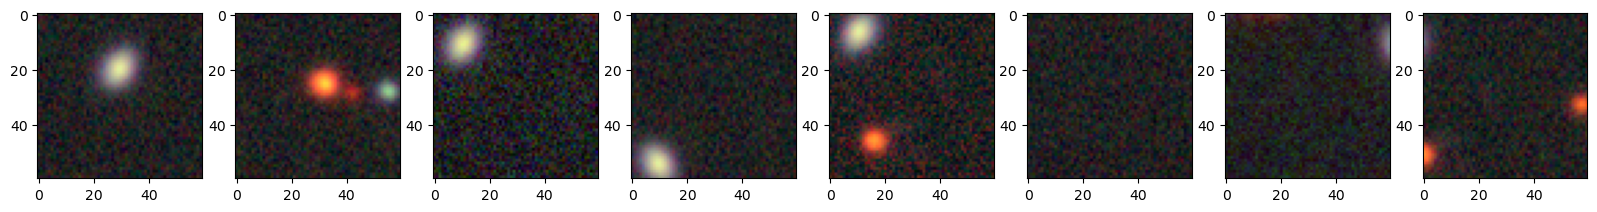

In [12]:
# plot all local_crops

fig, axs = plt.subplots(1, 8, figsize=(20, 10))

for i in range(8):
    axs[i].imshow(imgs['local_crops'][i].T)

In [13]:
test_dataset = make_dataset(
        dataset_str='LegacySurvey:split=test:root=/mnt/ceph/users/polymathic/external_data/astro/DECALS_Stein_et_al/:extra=""',
        transform=augmentation
    )